# Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Data Boot Camp © 2018. All Rights Reserved.


Analysis:
    
Observed trend 1 - From the latitude Vs temperature plot, we can deduce 
that the temperature increases at it reaches 0 degree at the equator and 
decreases in either direction (north or south). However, lesser towards the south pole.

Observed trend 2 - From the latitude Vs wind speed plot, we can deduce 
that the wind speed is more towards the negative latitude(south pole).

Observed trend 3 - From the latitude Vs cloudiness plot, we can deduce 
that the change in latitude and cloudiness are not related.

In [22]:
import random
import requests
import time

import pandas as pd
import openweathermapy as owm
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib notebook

from citipy import citipy
from datetime import datetime
from pprint import pprint
from config import api_key
from config import gkey

In [23]:
###Step1: Generating a list of tuples of coordinates using random.uniform \
#       (not randon.randint)

#Initializing Coordinates' list
Coordinates = []

#Creating tuples of lat & long using random.uniform & appending to the list
for i in range(500):
    lat,long = round(random.uniform(-90,90),2),round(random.uniform(-180,180),2)
    Coordinates.append((lat,long))

#Display a few coordinates
Coordinates[0:4]

[(-21.88, 107.01), (-46.77, -115.6), (-0.47, -24.96), (-10.07, 171.63)]

In [24]:
###Step 2:Randomly select at least 500 unique (non-repeat) cities 
#based on latitude and longitude.Using "citipy" module

#Initializing Cities' list to hold the object returned from citipy
Cities = []

#Getting nearest cities using "citipy" using latitudes & longitudes
for coordinate_pairs in Coordinates:
    lati,longi = coordinate_pairs
    Cities.append(citipy.nearest_city(lati,longi)) 

#Initializing the city_names' list to hold the city names
Nearest_City_names = []
Countries_names = []

#Generate Cities List
for city in Cities:
    Nearest_City_names.append(city.city_name.title())   
    Countries_names.append(city.country_code.upper())

#Display a few city names
print(Nearest_City_names[0:4])
print(Countries_names[0:4])

['Carnarvon', 'Rikitea', 'Touros', 'Sola']
['AU', 'PF', 'BR', 'VU']


In [25]:
###Step3:Perform a weather check on each of the cities using a series of 
#successive API calls.

#Settings
Settings={"units":"imperial","APPID":api_key}

#Method1
Views = {
        "Summary1" : ["coord.lon", "coord.lat","main.temp","main.humidity","wind.speed","clouds.all"]
        }
#Method2
Summary2 = ["coord.lon","coord.lat","main.temp","main.humidity","wind.speed","clouds.all"]

Selected_data1 = []
Weather_data1 = []

Selected_data2 = []
Weather_data2 = []

In [26]:
#Get current weather using coordinates (Use either of the methods and 
#comment the other one)

#Method1
# for coordinate in Coordinates:
#     Weather_data1 = owm.get_current(coordinate,**Settings)
#     Selected_data1.append(Weather_data1.get_dict(Views["Summary1"]))
#Selected_data = Selected_data1
#Method2
Weather_data2 = [owm.get_current(coordinate,**Settings) for coordinate in Coordinates]
Selected_data2 = [response(*Summary2) for response in Weather_data2]
Selected_data = Selected_data2

In [27]:
Column_names = ["Longitude (Degrees)","Latitude (Degrees)","Maximum Temperature (F)",
                "Humidity (%)","Wind Speed (MPH)","Cloudiness (%)"]

In [28]:
Weather_Dataframe = pd.DataFrame(Selected_data, index=Nearest_City_names,
                                columns = Column_names)                                       

Weather_Dataframe.reset_index(inplace=True)
Weather_Dataframe.rename(columns={"index":"Nearest City Names"},inplace=True)
#Weather_Dataframe.set_index("Nearest City Names",inplace=True)

In [29]:
Weather_Dataframe.head()

,Nearest City Names,Longitude (Degrees),Latitude (Degrees),Maximum Temperature (F),Humidity (%),Wind Speed (MPH),Cloudiness (%)
0,Carnarvon,107.01,-21.88,72.22,100,18.37,0
1,Rikitea,-115.60,-46.77,48.37,93,25.75,92
2,Touros,-24.96,-0.47,77.53,100,9.98,92
3,Sola,171.63,-10.07,82.57,100,15.57,92
4,Mataura,-143.73,-60.26,25.60,100,19.71,24


In [30]:
Weather_Dataframe["Countries"] = Countries_names

In [31]:
Weather_Dataframe = Weather_Dataframe [["Nearest City Names","Countries","Longitude (Degrees)","Latitude (Degrees)","Maximum Temperature (F)",
                "Humidity (%)","Wind Speed (MPH)","Cloudiness (%)"]]

In [32]:
Weather_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Nearest City Names         500 non-null object
Countries                  500 non-null object
Longitude (Degrees)        500 non-null float64
Latitude (Degrees)         500 non-null float64
Maximum Temperature (F)    500 non-null float64
Humidity (%)               500 non-null int64
Wind Speed (MPH)           500 non-null float64
Cloudiness (%)             500 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.3+ KB


In [33]:
Weather_Dataframe.head()

,Nearest City Names,Countries,Longitude (Degrees),Latitude (Degrees),Maximum Temperature (F),Humidity (%),Wind Speed (MPH),Cloudiness (%)
0,Carnarvon,AU,107.01,-21.88,72.22,100,18.37,0
1,Rikitea,PF,-115.60,-46.77,48.37,93,25.75,92
2,Touros,BR,-24.96,-0.47,77.53,100,9.98,92
3,Sola,VU,171.63,-10.07,82.57,100,15.57,92
4,Mataura,PF,-143.73,-60.26,25.60,100,19.71,24


In [34]:
Weather_Dataframe.to_csv("MyOutputFiles/Weather.csv",header=True)

Objextive: To build a series of scatter plots to showcase the following relationships:
Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

Temperature vs. Latitude Plot

In [35]:
x = Weather_Dataframe["Latitude (Degrees)"]
y1 = Weather_Dataframe["Maximum Temperature (F)"]

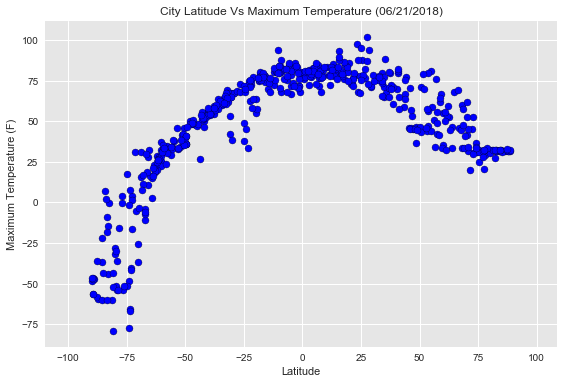

In [36]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Maximum Temperature (F)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y1.min()-10,y1.max()+10)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title(f"City Latitude Vs Maximum Temperature ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Temperature(F) vs. Latitude.png")
plt.show()

Humidity(%) vs. Latitude Plot

In [37]:
y2 = Weather_Dataframe["Humidity (%)"]

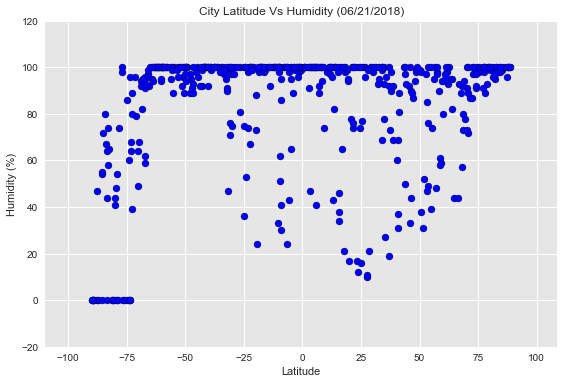

In [38]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Humidity (%)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y2.min()-20,y2.max()+20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude Vs Humidity ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Humidity(%) vs. Latitude.png")
plt.show()

Wind Speed(mph) vs. Latitude Plot

In [39]:
y3 = Weather_Dataframe["Wind Speed (MPH)"]

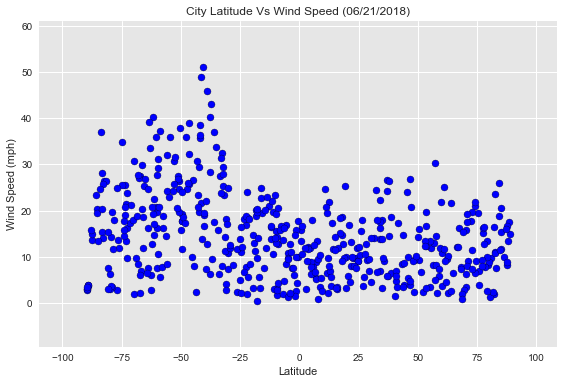

In [40]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Wind Speed (MPH)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y3.min()-10,y3.max()+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Wind Speed(MPH) vs. Latitude.png")
plt.show()

Cloudiness(%) vs. Latitude Plot

In [41]:
y4 = Weather_Dataframe["Cloudiness (%)"]

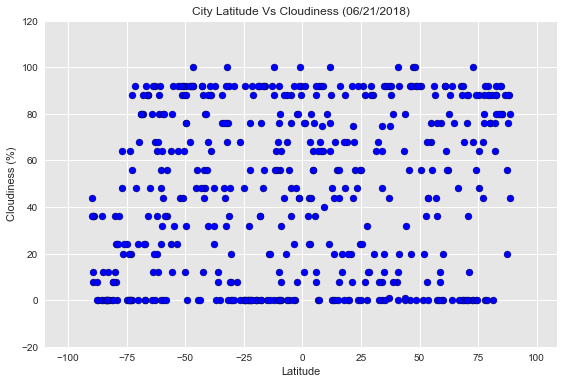

In [42]:
plt.scatter(Weather_Dataframe["Latitude (Degrees)"],Weather_Dataframe["Cloudiness (%)"],
           facecolor="b",edgecolor="black")
plt.xlim(x.min()-20,x.max()+20)
plt.ylim(y4.min()-20,y4.max()+20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.tight_layout()
plt.savefig("MyImages/Cloudiness(%) vs. Latitude.png")
plt.show()